In [4]:
import gizmo_analysis as gizmo
import halo_analysis as halo
import matplotlib.pyplot as plt
import numpy as np
import utilities as ut
from astropy.io import ascii
from gc_utils import get_halo_tree, main_prog_halt  # noqa: F401
from scipy.optimize import minimize, minimize_scalar

In [5]:
sim = "m12i"
snapshot = 600

sim_dir = "../../../simulations/"
# sim_dir = "../../simulations/"
data_dir = "data/"
sim_codes = data_dir + "external/simulation_codes.json"

fire_dir = sim_dir + sim + "/" + sim + "_res7100/"

In [86]:
halt = get_halo_tree(sim, sim_dir)

Retrieving Halo Tree.....................: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


In [7]:
snap_lst = np.linspace(10, 600, 591, dtype=int)
hals = halo.io.IO.read_catalogs("index", snap_lst, fire_dir)

In [8]:
main_halo_tid = 25236877
tid_main_lst = main_prog_halt(halt, main_halo_tid)

In [9]:
halt.keys()

dict_keys(['am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'catalog.index', 'central.index', 'central.local.index', 'descendant.index', 'descendant.snapshot', 'dindex', 'final.index', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.lowres', 'mass.vir', 'position', 'position.offset', 'progenitor.co.dindex', 'progenitor.co.index', 'progenitor.last.dindex', 'progenitor.main.index', 'progenitor.main.last.dindex', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'snapshot', 'spin.bullock', 'spin.peebles', 'tid', 'vel.circ.max', 'vel.std', 'velocity', 'velocity.offset'])

In [10]:
tid_main_lst
cid_main_lst = []
snap_main_lst = []
for tid in tid_main_lst:
    idx = np.where(halt["tid"] == tid)[0][0]
    if halt["snapshot"][idx] in snap_lst:
        cid_main_lst.append(halt["catalog.index"][idx])
        snap_main_lst.append(halt["snapshot"][idx])

In [13]:
accrete_rate_lst = []
for cid, snap in zip(cid_main_lst, snap_main_lst):
    # accrete_rate = hals[snap]["accrete.rate"][cid]
    # accrete_rate = hals[snap]["accrete.rate.100Myr"][cid]
    accrete_rate = hals[snap]["accrete.rate.tdyn"][cid]
    accrete_rate_lst.append(accrete_rate)

In [31]:
all_snapshot_fil = "/Users/z5114326/Documents/simulations/m12i/m12i_res7100/snapshot_times.txt"
with open(all_snapshot_fil) as f:
    content = f.readlines()
    content = content[5:]
snap_all = ascii.read(content)["i"]
tim_all = ascii.read(content)["time[Gyr]"]
lbt_all = ascii.read(content)["lookback-time[Gyr]"]

tim_lst = []
for snap in snap_main_lst:
    idx = np.where(snap_all == snap)[0][0]
    tim_lst.append(tim_all[idx])

Text(0, 0.5, 'Mass growth rate averaged \n over halo dynamical time [M_sun / yr]')

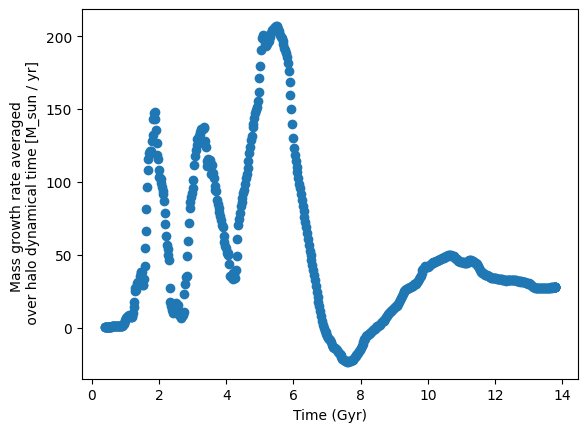

In [34]:
# plt.scatter(snap_main_lst, accrete_rate_lst)
plt.scatter(tim_lst, accrete_rate_lst)
plt.xlabel("Time (Gyr)")
plt.ylabel("Mass growth rate averaged \n over halo dynamical time [M_sun / yr]")

In [39]:
halt.keys()

dict_keys(['am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'catalog.index', 'central.index', 'central.local.index', 'descendant.index', 'descendant.snapshot', 'dindex', 'final.index', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.lowres', 'mass.vir', 'position', 'position.offset', 'progenitor.co.dindex', 'progenitor.co.index', 'progenitor.last.dindex', 'progenitor.main.index', 'progenitor.main.last.dindex', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'snapshot', 'spin.bullock', 'spin.peebles', 'tid', 'vel.circ.max', 'vel.std', 'velocity', 'velocity.offset'])

In [79]:
# t_log_lim = 4.5

data_dict = {}
for tid in tid_main_lst:
    idx = np.where(halt["tid"] == tid)[0][0]
    snap = halt["snapshot"][idx]
    data_dict[str(snap)] = {}
    data_dict[str(snap)]["progenitors"] = {}

    num_prog = halt["progenitor.number"][idx]
    data_dict[str(snap)]["num_progenitors"] = num_prog

    prog_idx = halt["progenitor.main.index"][idx]
    for _ in range(1, num_prog):
        prog_idx = halt["progenitor.co.index"][prog_idx]

        if halt["am.phantom"][prog_idx] == 0:
            tid = halt["tid"][prog_idx]
            mass = halt["mass"][prog_idx]
            vel = halt["velocity"][prog_idx]
            cat_idx = halt["catalog.index"][prog_idx]

            data_dict[str(snap)]["progenitors"][str(tid)] = {}
            data_dict[str(snap)]["progenitors"][str(tid)]["mass"] = mass
            data_dict[str(snap)]["progenitors"][str(tid)]["velocity"] = vel
            data_dict[str(snap)]["progenitors"][str(tid)]["cat_idx"] = cat_idx

In [ ]:
part = gizmo.io.Read.read_snapshots(["star", "gas"], "index", 0, fire_dir)

In [82]:
halt["host.index"]

array([    0,     1,     1, ..., 21976, 22774, 23579], dtype=int32)

In [94]:
halt_gas = halo.io.IO.read_tree(simulation_directory=fire_dir, assign_hosts_rotation=True, species="gas")